 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [43]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [45]:
# Reading whale returns
whale_returns_csv = Path("Resources\\whale_returns.csv")



# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, parse_dates=True, infer_datetime_format=True)
#whale_df = whale_df.set_index('Date')
whale_datetime_series = pd.to_datetime(whale_df['Date'])
whale_datetime_index = pd.DatetimeIndex(whale_datetime_series.values)
whale_df = whale_df.set_index(whale_datetime_index)
whale_df.drop('Date', axis=1, inplace=True)
whale_df.sort_index(inplace=True, ascending=True)
whale_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [46]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [47]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [48]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources\\algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, parse_dates=True, infer_datetime_format=True)

algo_datetime_series = pd.to_datetime(algo_df['Date'])
algo_datetime_index = pd.DatetimeIndex(algo_datetime_series.values)
algo_df = algo_df.set_index(algo_datetime_index)
algo_df.drop('Date', axis=1, inplace=True)
algo_df.sort_index(inplace=True, ascending=True)
algo_df.head()

Algo 1  Algo 2
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [49]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [50]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [51]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources\\sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, parse_dates=True, infer_datetime_format=True)
sp500_df['Date'] = pd.to_datetime(sp500_df['Date']).dt.date
sp500_datetime_series = pd.to_datetime(sp500_df['Date'])
sp500_datetime_index = pd.DatetimeIndex(sp500_datetime_series.values)
sp500_df.drop('Date', axis=1, inplace=True)
sp500_df = sp500_df.set_index(sp500_datetime_index)
sp500_df.sort_index(inplace=True, ascending=True)
sp500_df.head()

Close
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93

In [52]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [53]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [54]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_df = sp500_df.pct_change()
sp500_df.head()

Close
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [55]:
# Drop nulls
# YOUR CODE HERE
sp500_df.dropna(inplace=True)
sp500_df.head()

Close
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [56]:
# Rename Column
# YOUR CODE HERE
sp500_df.rename(columns={'Close':'S&P 500'}, inplace=True)
sp500_df.head()

S&P 500
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [57]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

all_returns_df = pd.concat([whale_df, algo_df, sp500_df], axis='columns', join='inner')

all_returns_df.dropna(inplace=True)
all_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

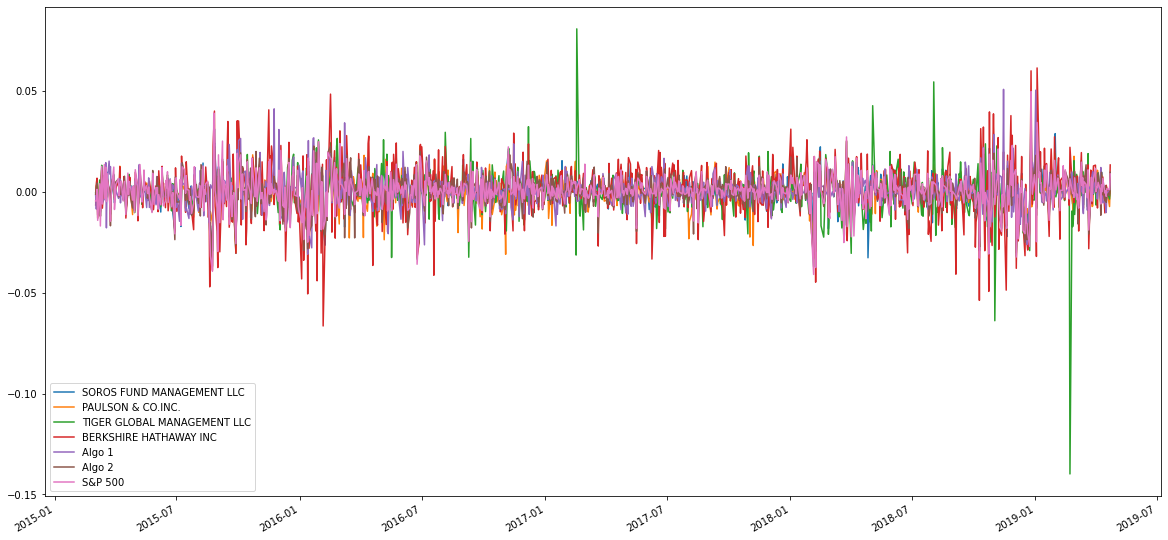

In [58]:
# Plot daily returns
# YOUR CODE HERE
all_returns_df.plot(figsize=(20,10))

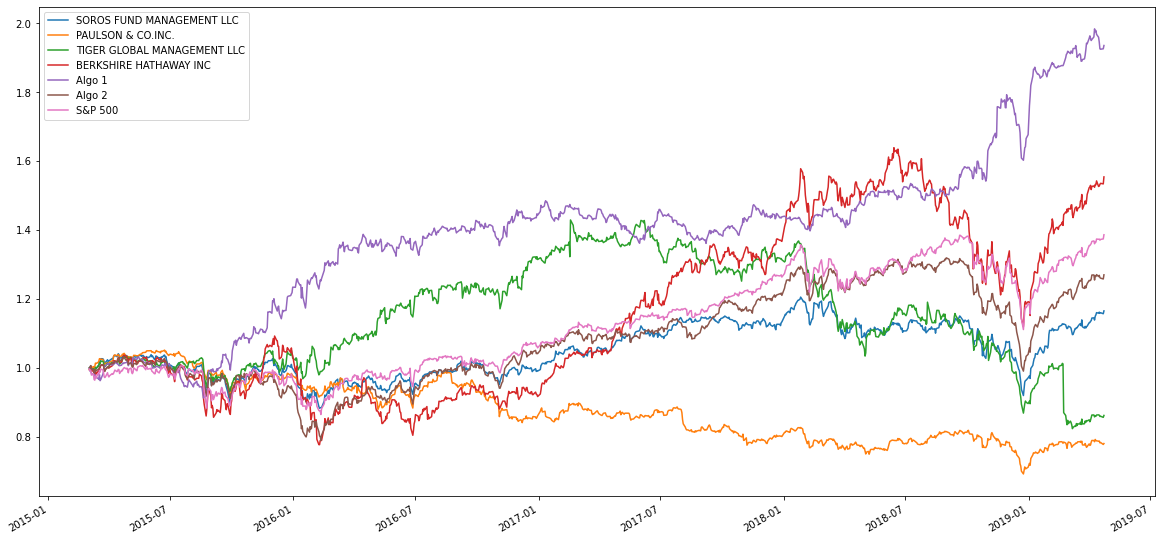

In [59]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_df = (1 + all_returns_df).cumprod()
cumulative_df.plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

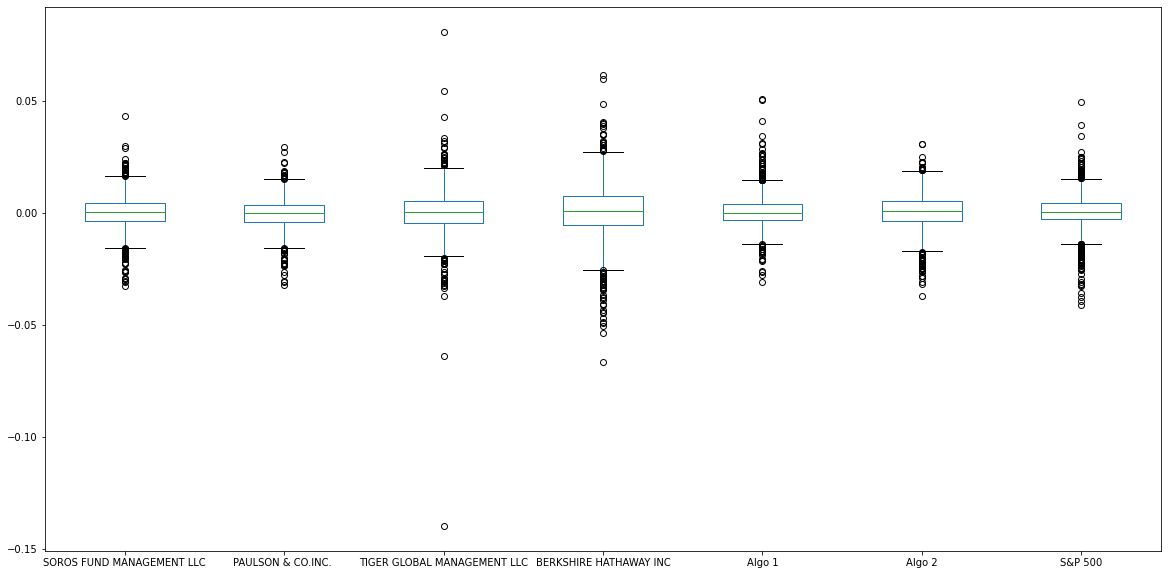

In [60]:
# Box plot to visually show risk
# YOUR CODE HERE
all_returns_df.plot.box(figsize=(20,10))

In [61]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_standard_df = all_returns_df.std()
daily_standard_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [62]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
riskier_df = daily_standard_df.loc[:,] > daily_standard_df.at['S&P 500']
riskier_df

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [63]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_standard_df * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

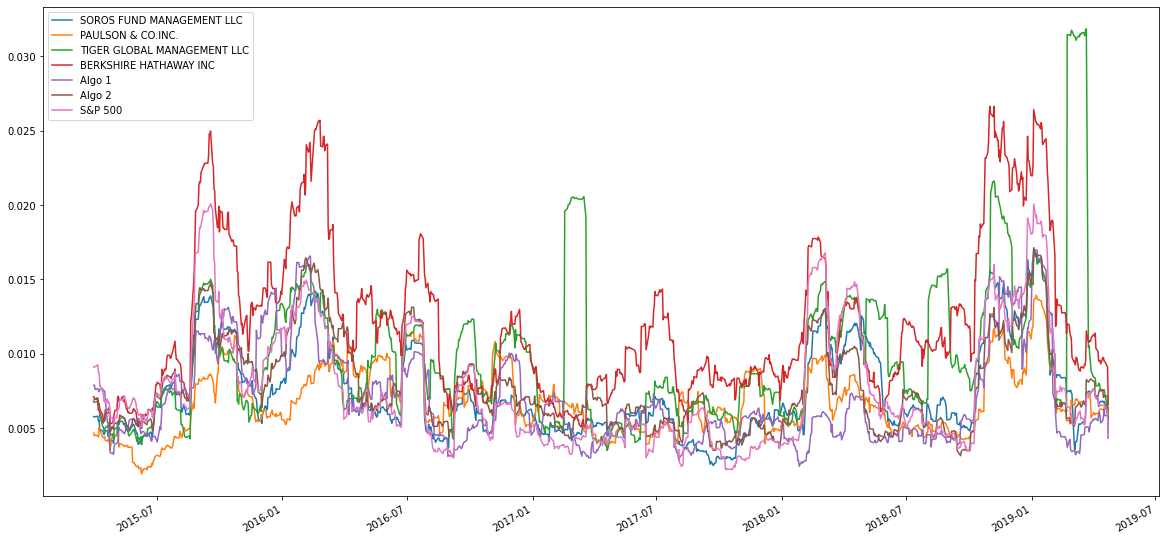

In [64]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
all_returns_df.rolling(window=21).std().plot(figsize=(20,10))

In [65]:
# Construct a correlation table
# YOUR CODE HERE
correlation = all_returns_df.corr()
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
S&P 500                                         0.623946   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
S&P 500                                    0.751371  0.279494  0.858764   

                              S&P 500  
SOROS FUND MANAGEMENT LLC    0.837864  
PAULSON & CO.INC.            0.669732  
TIGER GLOBAL MANAGEMENT LLC  0.623946  
BERKSHIRE HATHAWAY INC       0.751371  
Algo 1                       0.279494  
Algo 2                       0.858764  
S&P 500                      1.000000

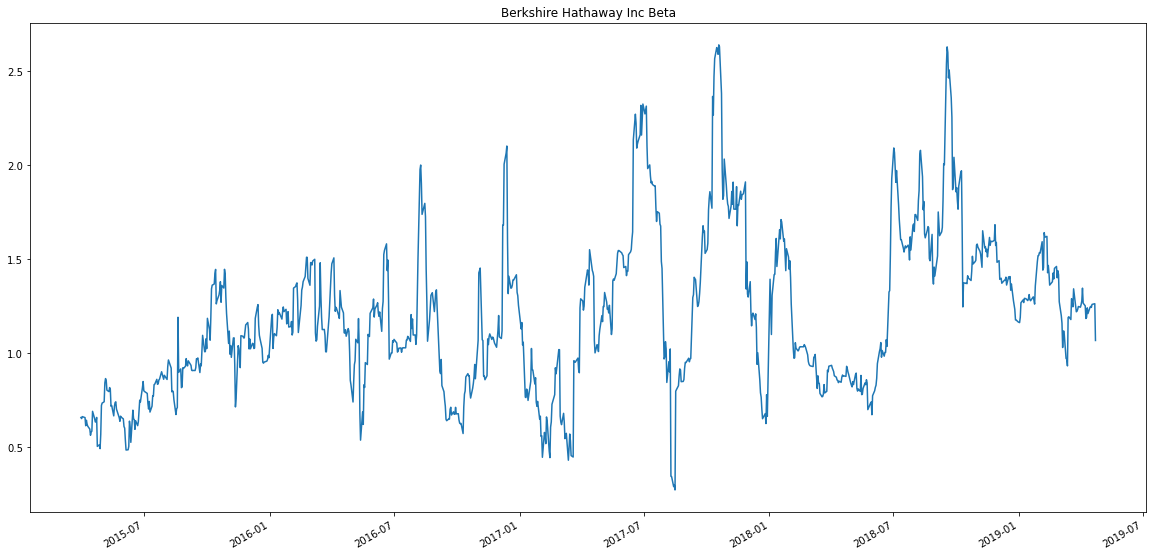

In [66]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
rolling_covariance = all_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(all_returns_df['S&P 500'])
rolling_variance = all_returns_df['S&P 500'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.dropna()
rolling_beta.plot(figsize=(20,10), title='Berkshire Hathaway Inc Beta')

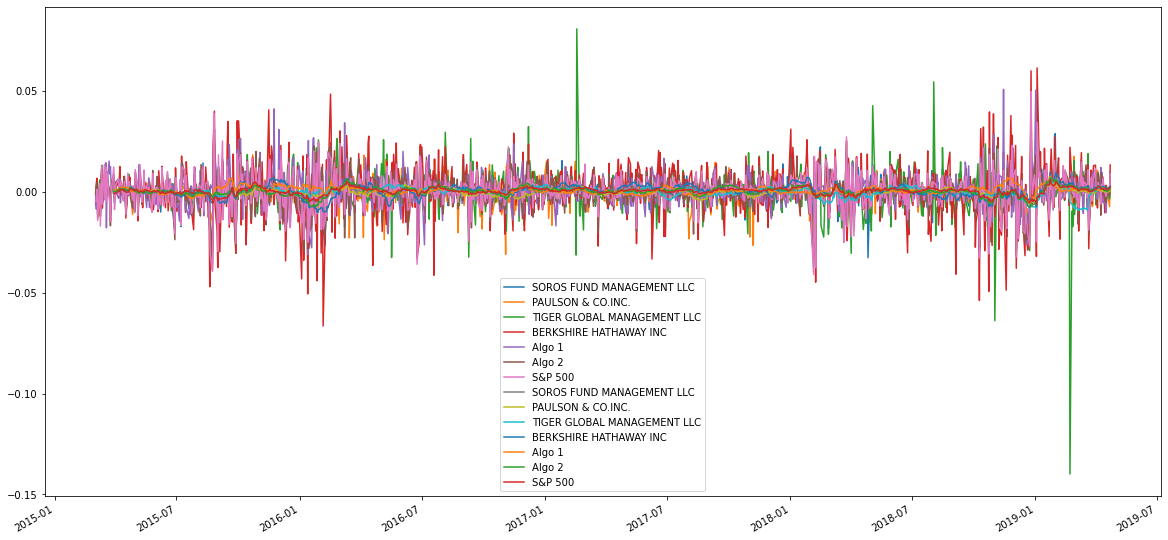

In [67]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
all_returns_sma = all_returns_df.rolling(window=20).mean()
all_returns_sma.dropna()
ax = all_returns_df.plot(figsize=(20,10))
all_returns_sma.plot(ax=ax)

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [68]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

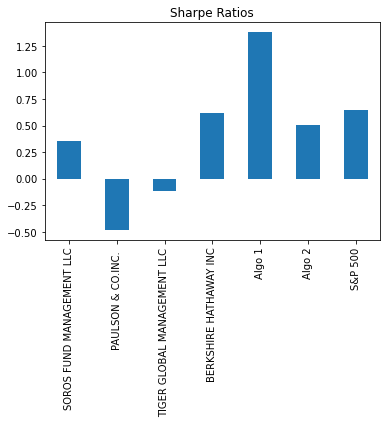

In [69]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [70]:
# Read the first stock
# YOUR CODE HERE
tsla_file = Path("tsla.csv")
tsla_df = pd.read_csv(tsla_file, parse_dates=True, infer_datetime_format=True)
tsla_df['Date'] = pd.to_datetime(tsla_df['Date']).dt.date
tsla_datetime_series = pd.to_datetime(tsla_df['Date'])
tsla_datetime_index = pd.DatetimeIndex(tsla_datetime_series.values)
tsla_df.drop('Date', axis=1, inplace=True)
tsla_df = tsla_df.set_index(tsla_datetime_index)
tsla_df.sort_index(inplace=True, ascending=True)
tsla_df.rename(columns={'Close':'TSLA'}, inplace=True)
tsla_df.head()

TSLA
2014-03-03  50.11
2014-03-04  50.97
2014-03-05  50.53
2014-03-06  50.59
2014-03-07  49.24

In [71]:
# Read the second stock
# YOUR CODE HERE
msft_file = Path("msft.csv")
msft_df = pd.read_csv(msft_file, parse_dates=True, infer_datetime_format=True)
msft_df['Date'] = pd.to_datetime(msft_df['Date']).dt.date
msft_datetime_series = pd.to_datetime(msft_df['Date'])
msft_datetime_index = pd.DatetimeIndex(msft_datetime_series.values)
msft_df.drop('Date', axis=1, inplace=True)
msft_df = msft_df.set_index(msft_datetime_index)
msft_df.sort_index(inplace=True, ascending=True)
msft_df.rename(columns={'Close':'MSFT'}, inplace=True)
msft_df.head()

MSFT
2014-03-03  37.78
2014-03-04  38.41
2014-03-05  38.11
2014-03-06  38.15
2014-03-07  37.90

In [72]:
# Read the third stock
# YOUR CODE HERE

aapl_file = Path("aapl.csv")
aapl_df = pd.read_csv(aapl_file, parse_dates=True, infer_datetime_format=True)
aapl_df['Date'] = pd.to_datetime(aapl_df['Date']).dt.date
aapl_datetime_series = pd.to_datetime(aapl_df['Date'])
aapl_datetime_index = pd.DatetimeIndex(aapl_datetime_series.values)
aapl_df.drop('Date', axis=1, inplace=True)
aapl_df = aapl_df.set_index(aapl_datetime_index)
aapl_df.sort_index(inplace=True, ascending=True)
aapl_df.rename(columns={'Close':'AAPL'}, inplace=True)
aapl_df.head()

AAPL
2014-03-03  18.85
2014-03-04  18.97
2014-03-05  19.01
2014-03-06  18.96
2014-03-07  18.94

In [73]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

all_stocks_df = pd.concat([tsla_df,msft_df,aapl_df], axis='columns', join="inner")
all_stocks_df = all_stocks_df.pct_change()
all_stocks_df.head()

TSLA      MSFT      AAPL
2014-03-03       NaN       NaN       NaN
2014-03-04  0.017162  0.016675  0.006366
2014-03-05 -0.008633 -0.007810  0.002109
2014-03-06  0.001187  0.001050 -0.002630
2014-03-07 -0.026685 -0.006553 -0.001055

In [74]:
# Reset the index
# YOUR CODE HERE
#all_stocks_df = all_stocks_df.reset_index()
all_stocks_df

TSLA      MSFT      AAPL
2014-03-03       NaN       NaN       NaN
2014-03-04  0.017162  0.016675  0.006366
2014-03-05 -0.008633 -0.007810  0.002109
2014-03-06  0.001187  0.001050 -0.002630
2014-03-07 -0.026685 -0.006553 -0.001055
...              ...       ...       ...
2015-02-24 -0.015674 -0.001359 -0.006316
2015-02-25 -0.001715 -0.002268 -0.025424
2015-02-26  0.016933  0.001591  0.012422
2015-02-27 -0.018581 -0.004766 -0.014724
2015-03-02 -0.029506  0.000684  0.004670

[252 rows x 3 columns]

In [32]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [75]:
# Drop Nulls
# YOUR CODE HERE
all_stocks_df.dropna(inplace=True)
all_stocks_df.head()

TSLA      MSFT      AAPL
2014-03-04  0.017162  0.016675  0.006366
2014-03-05 -0.008633 -0.007810  0.002109
2014-03-06  0.001187  0.001050 -0.002630
2014-03-07 -0.026685 -0.006553 -0.001055
2014-03-10 -0.029854 -0.002111  0.001056

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [76]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
returns_df = all_stocks_df.dot(weights)
returns_df.head()

2014-03-04    0.013401
2014-03-05   -0.004778
2014-03-06   -0.000131
2014-03-07   -0.011431
2014-03-10   -0.010303
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [77]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_returns_custom_df = pd.concat([all_returns_df, returns_df], axis='columns')
all_returns_custom_df.rename(columns={0:'Custom'}, inplace=True)
all_returns_custom_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2014-03-04                        NaN                 NaN   
2014-03-05                        NaN                 NaN   
2014-03-06                        NaN                 NaN   
2014-03-07                        NaN                 NaN   
2014-03-10                        NaN                 NaN   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2014-03-04                          NaN                     NaN       NaN   
2014-03-05                          NaN                     NaN       NaN   
2014-03-06                          NaN                     NaN       NaN   
2014-03-07                          NaN                     NaN       NaN   
2014-03-10                          NaN                     NaN       NaN   
...                                 ...                     ...       ...   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2   S&P 500    Custom  
2014-03-04       NaN       NaN  0.013401  
2014-03-05       NaN       NaN -0.004778  
2014-03-06       NaN       NaN -0.000131  
2014-03-07       NaN       NaN -0.011431  
2014-03-10       NaN       NaN -0.010303  
...              ...       ...       ...  
2019-04-16  0.002899  0.000509       NaN  
2019-04-17 -0.005228 -0.002274       NaN  
2019-04-18 -0.001229  0.001579       NaN  
2019-04-22 -0.001936  0.001012       NaN  
2019-04-23  0.009622  0.008841       NaN  

[1294 rows x 8 columns]

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [78]:
# Risk
# YOUR CODE HERE
custom_df = all_returns_custom_df.std()
custom_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
Custom                         0.013356
dtype: float64

In [38]:
# Rolling
# YOUR CODE HERE

In [79]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
updated_sharpe_ratios = (all_returns_custom_df.mean() * 252) / (all_returns_custom_df.std() * np.sqrt(252))
updated_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Custom                         0.921148
dtype: float64

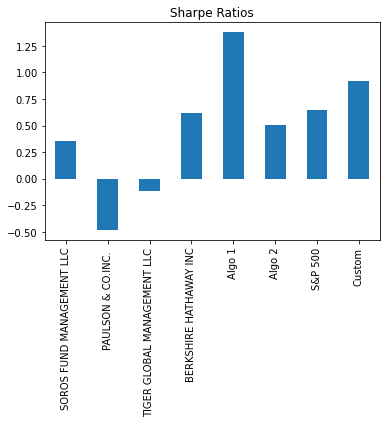

In [80]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
updated_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

In [81]:
# Create a correlation analysis
# YOUR CODE HERE
updated_correlation = all_returns_custom_df.corr()
updated_correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   
Custom                                             NaN                 NaN   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
S&P 500                                         0.623946   
Custom                                               NaN   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
S&P 500                                    0.751371  0.279494  0.858764   
Custom                                          NaN       NaN       NaN   

                              S&P 500  Custom  
SOROS FUND MANAGEMENT LLC    0.837864     NaN  
PAULSON & CO.INC.            0.669732     NaN  
TIGER GLOBAL MANAGEMENT LLC  0.623946     NaN  
BERKSHIRE HATHAWAY INC       0.751371     NaN  
Algo 1                       0.279494     NaN  
Algo 2                       0.858764     NaN  
S&P 500                      1.000000     NaN  
Custom                            NaN     1.0

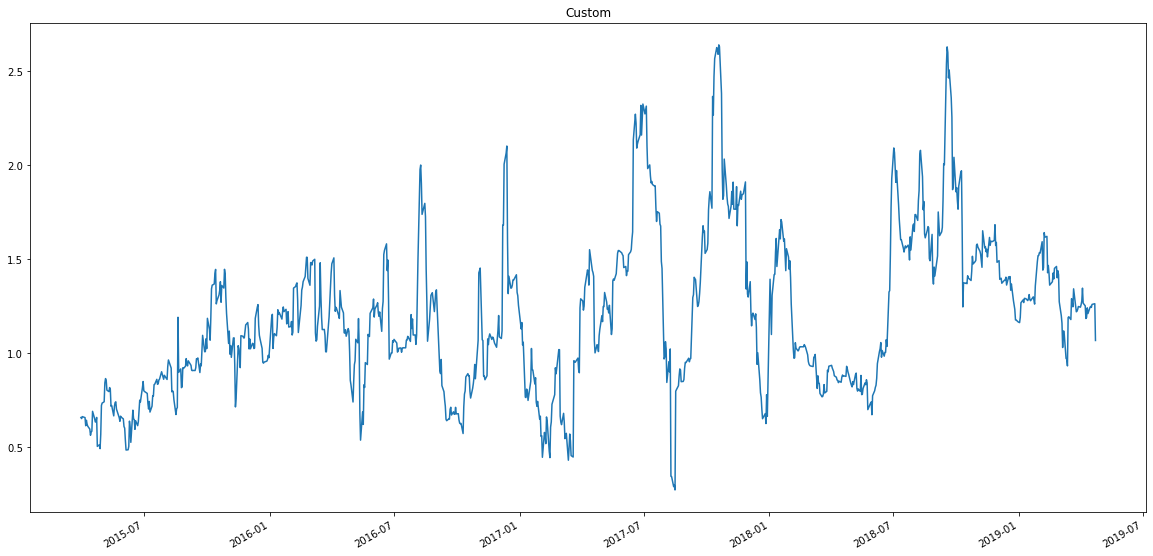

In [83]:
# Beta
# YOUR CODE HERE
updated_rolling_covariance = all_returns_custom_df['Custom'].rolling(window=21).cov(all_returns_df['S&P 500'])
updated_rolling_variance = all_returns_df['S&P 500'].rolling(window=21).var()
updated_rolling_beta = rolling_covariance / rolling_variance
updated_rolling_beta.dropna(inplace=True)
updated_rolling_beta.plot(figsize=(20,10), title='Custom')